In [7]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
df = pd.read_csv(r"D:\ml\handson-ml2-master\datasets\housing\housing.csv")

In [10]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [12]:
df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [13]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000295C8425AC8>,
      dtype=object)

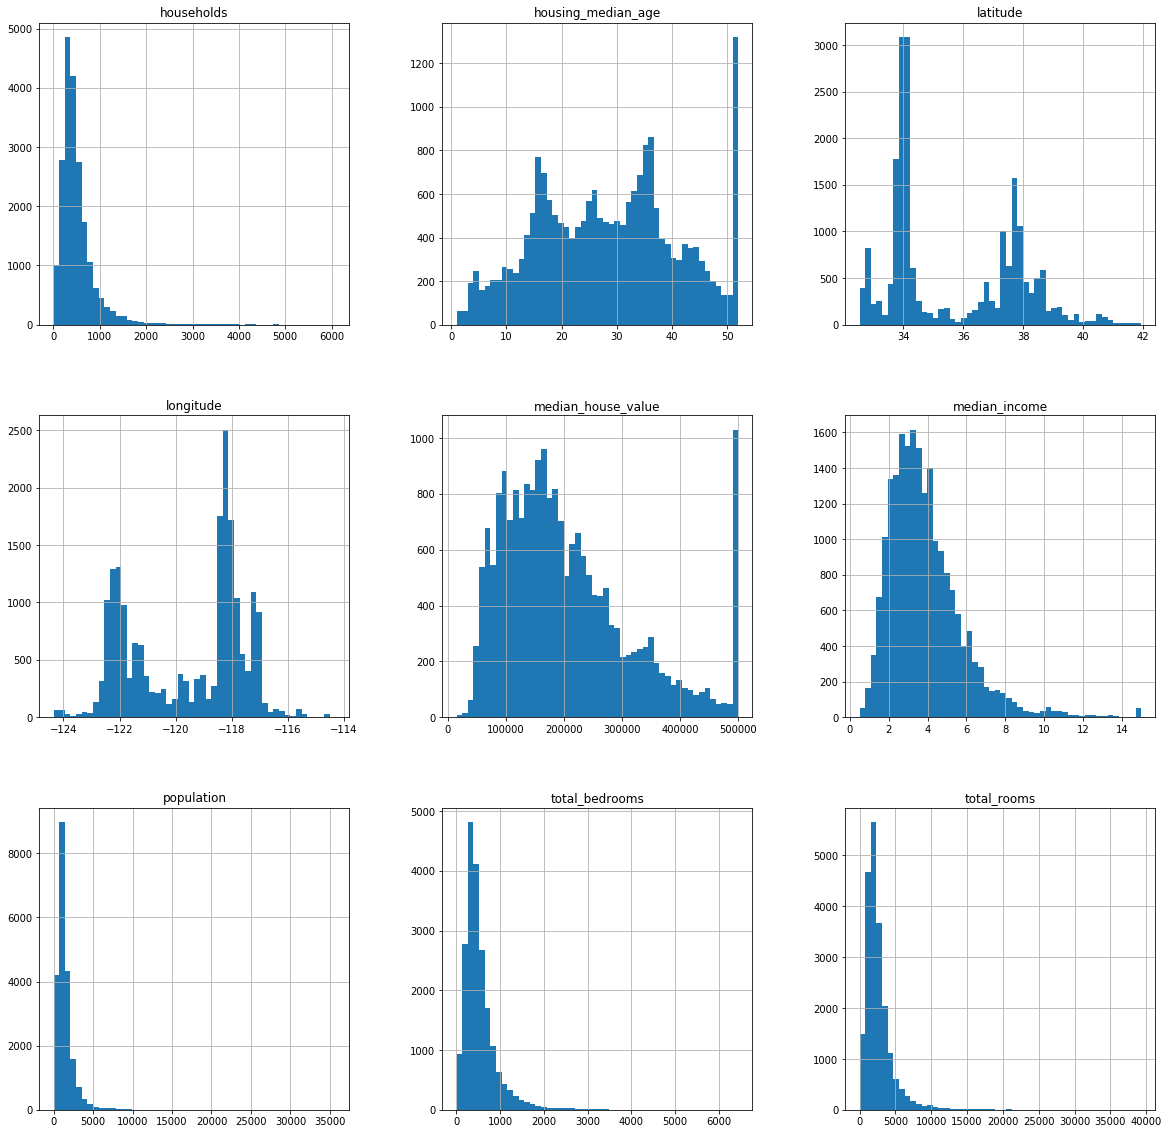

In [14]:
df.hist(bins = 50, figsize = (20,20))

In [15]:
df['income_cat'] = pd.cut(df['median_income'], bins = [0,1.5,3,4.5,6,np.inf], labels = [1,2,3,4,5])

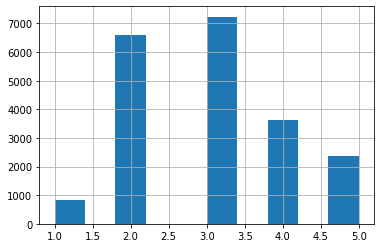

In [16]:
df['income_cat'].hist()

In [17]:
from sklearn.model_selection import StratifiedShuffleSplit

In [18]:
split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 42)
for train_index,test_index in split.split(df,df['income_cat']):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

In [19]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,2
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,2
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,2
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,2


In [20]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

In [21]:

for set_ in (strat_train_set, strat_test_set):
 set_.drop("income_cat", axis=1, inplace=True)

In [22]:
strat_train_set.shape

(16512, 10)

In [23]:
strat_test_set.shape

(4128, 10)

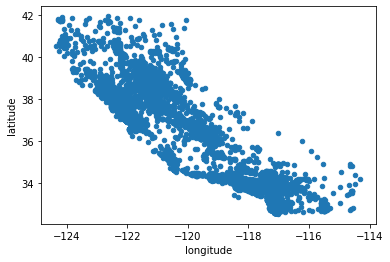

In [24]:
#visualizing the geography 
housing = strat_train_set
housing.plot(kind = 'scatter', x = 'longitude', y = 'latitude')

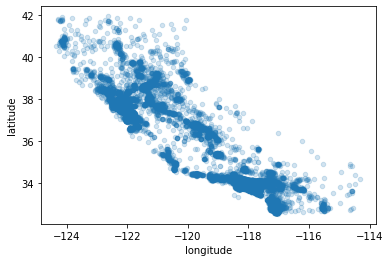

In [25]:
housing.plot(kind = 'scatter', x = 'longitude', y = 'latitude', alpha = 0.2)

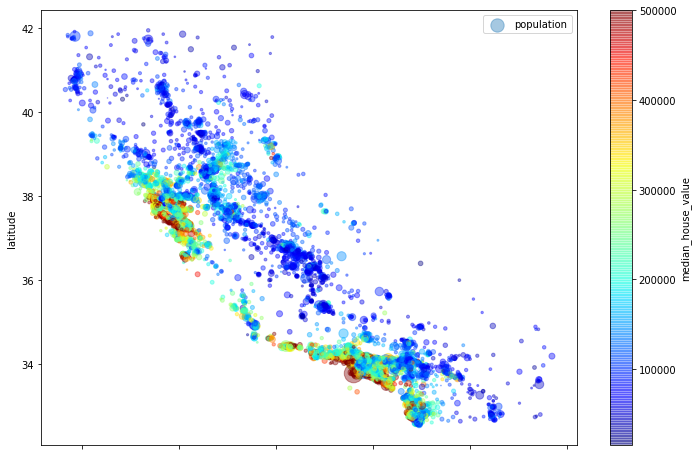

In [26]:
housing.plot(kind = 'scatter', x = 'longitude', y = 'latitude', alpha = 0.4, s = df['population']/100, c = 'median_house_value', 
             cmap = 'jet', label = 'population', figsize = (12,8))

In [27]:
'''The correlation coefficient ranges from –1 to 1. When it is close to 1, it means that
there is a strong positive correlation; for example, the median house value tends to go
up when the median income goes up. When the coefficient is close to –1, it means
that there is a strong negative correlation; you can see a small negative correlation
between the latitude and the median house value (i.e., prices have a slight tendency to
go down when you go north). Finally, coefficients close to zero mean that there is no
linear correlation. Figure 2-14 shows various plots along with the correlation coeffi‐
cient between their horizontal and vertical axes.'''



'''The correlation coefficient only measures linear correlations. if x
goes up, then y generally goes up/down. It may completely miss
out on nonlinear relationships'''



'The correlation coefficient only measures linear correlations. if x\ngoes up, then y generally goes up/down. It may completely miss\nout on nonlinear relationships'

In [28]:
cm = housing.corr()
cm['median_house_value'].sort_values(ascending = False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

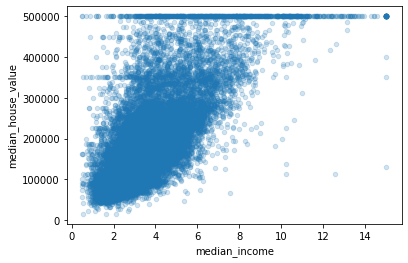

In [29]:
housing.plot(kind = 'scatter', x = 'median_income', y = 'median_house_value', alpha = 0.2)

In [30]:
housing['rooms_per_threshold'] = housing['total_rooms']/housing['households']
housing['population_per_threshold'] = housing['population']/housing['households']
housing['bedrooms_per_total_rooms'] = housing['total_bedrooms']/housing['total_rooms']

In [31]:
cm = housing.corr()
cm['median_house_value'].sort_values(ascending = False)

median_house_value          1.000000
median_income               0.687160
rooms_per_threshold         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_threshold   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_total_rooms   -0.259984
Name: median_house_value, dtype: float64

In [32]:
housing = strat_train_set.drop('median_house_value', axis = 1)
batman = strat_train_set.drop('median_house_value', axis = 1)
housing_labels = strat_train_set['median_house_value'].copy()

In [33]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 17606 to 15775
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   longitude                 16512 non-null  float64
 1   latitude                  16512 non-null  float64
 2   housing_median_age        16512 non-null  float64
 3   total_rooms               16512 non-null  float64
 4   total_bedrooms            16354 non-null  float64
 5   population                16512 non-null  float64
 6   households                16512 non-null  float64
 7   median_income             16512 non-null  float64
 8   ocean_proximity           16512 non-null  object 
 9   rooms_per_threshold       16512 non-null  float64
 10  population_per_threshold  16512 non-null  float64
 11  bedrooms_per_total_rooms  16354 non-null  float64
dtypes: float64(11), object(1)
memory usage: 1.6+ MB


In [34]:
median = housing['total_bedrooms'].median()
housing['total_bedrooms'].fillna(median, inplace = True)
housing['bedrooms_per_total_rooms'].fillna(median, inplace = True)

In [35]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 17606 to 15775
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   longitude                 16512 non-null  float64
 1   latitude                  16512 non-null  float64
 2   housing_median_age        16512 non-null  float64
 3   total_rooms               16512 non-null  float64
 4   total_bedrooms            16512 non-null  float64
 5   population                16512 non-null  float64
 6   households                16512 non-null  float64
 7   median_income             16512 non-null  float64
 8   ocean_proximity           16512 non-null  object 
 9   rooms_per_threshold       16512 non-null  float64
 10  population_per_threshold  16512 non-null  float64
 11  bedrooms_per_total_rooms  16512 non-null  float64
dtypes: float64(11), object(1)
memory usage: 1.6+ MB


In [36]:
from sklearn.impute import SimpleImputer

In [37]:
imputer = SimpleImputer(strategy = 'mean')

In [38]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_threshold,population_per_threshold,bedrooms_per_total_rooms
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,<1H OCEAN,4.625369,2.094395,0.223852
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,<1H OCEAN,6.008850,2.707965,0.159057
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,NEAR OCEAN,4.225108,2.025974,0.241291
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,INLAND,5.232295,4.135977,0.200866
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,<1H OCEAN,4.505810,3.047847,0.231341
...,...,...,...,...,...,...,...,...,...,...,...,...
6563,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312,INLAND,6.052381,2.728571,0.185681
12053,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682,INLAND,4.635659,4.077519,0.245819
13908,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723,INLAND,6.346405,2.742484,0.179609
11159,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625,<1H OCEAN,5.505618,3.808989,0.193878


In [39]:
#housing.dropna(subset=["total_bedrooms"]) 
hnm = housing.drop('ocean_proximity', axis = 1)

In [40]:
hnm

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_threshold,population_per_threshold,bedrooms_per_total_rooms
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,4.625369,2.094395,0.223852
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,6.008850,2.707965,0.159057
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,4.225108,2.025974,0.241291
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,5.232295,4.135977,0.200866
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,4.505810,3.047847,0.231341
...,...,...,...,...,...,...,...,...,...,...,...
6563,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312,6.052381,2.728571,0.185681
12053,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682,4.635659,4.077519,0.245819
13908,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723,6.346405,2.742484,0.179609
11159,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625,5.505618,3.808989,0.193878


In [41]:
imputer.fit(hnm)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='mean', verbose=0)

In [42]:
imputer.statistics_

array([-119.57583394,   35.63957728,   28.65310078, 2622.7283188 ,
        533.99812258, 1419.7908188 ,  497.06038033,    3.87558937,
          5.44034053,    3.09643738,    4.35413071])

In [43]:
#to make sure if the system went online it would do the sam if we have any missign values there
X = imputer.transform(hnm)
X
housing_tr = pd.DataFrame(X,columns = hnm.columns)

In [44]:
housing_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   longitude                 16512 non-null  float64
 1   latitude                  16512 non-null  float64
 2   housing_median_age        16512 non-null  float64
 3   total_rooms               16512 non-null  float64
 4   total_bedrooms            16512 non-null  float64
 5   population                16512 non-null  float64
 6   households                16512 non-null  float64
 7   median_income             16512 non-null  float64
 8   rooms_per_threshold       16512 non-null  float64
 9   population_per_threshold  16512 non-null  float64
 10  bedrooms_per_total_rooms  16512 non-null  float64
dtypes: float64(11)
memory usage: 1.4 MB


In [45]:
from sklearn.preprocessing import OrdinalEncoder

In [46]:
housingpr = housing[['ocean_proximity']]
Oe = OrdinalEncoder()
hencoded = Oe.fit_transform(housingpr)

In [47]:
hencoded

array([[0.],
       [0.],
       [4.],
       ...,
       [1.],
       [0.],
       [3.]])

In [48]:
Oe.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [49]:
from sklearn.preprocessing import OneHotEncoder

In [50]:
Ohe = OneHotEncoder()

In [51]:
hcd = Ohe.fit_transform(hencoded).toarray()
hcd.shape

(16512, 5)

In [52]:
from sklearn.base import BaseEstimator, TransformerMixin

In [53]:
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
            return self # nothing else to do
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

In [54]:
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [55]:
addeddf = pd.DataFrame(housing_extra_attribs)
addeddf

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,-121.89,37.29,38,1568,351,710,339,2.7042,<1H OCEAN,4.62537,2.0944,0.223852,4.62537,2.0944
1,-121.93,37.05,14,679,108,306,113,6.4214,<1H OCEAN,6.00885,2.70796,0.159057,6.00885,2.70796
2,-117.2,32.77,31,1952,471,936,462,2.8621,NEAR OCEAN,4.22511,2.02597,0.241291,4.22511,2.02597
3,-119.61,36.31,25,1847,371,1460,353,1.8839,INLAND,5.23229,4.13598,0.200866,5.23229,4.13598
4,-118.59,34.23,17,6592,1525,4459,1463,3.0347,<1H OCEAN,4.50581,3.04785,0.231341,4.50581,3.04785
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16507,-118.13,34.2,46,1271,236,573,210,4.9312,INLAND,6.05238,2.72857,0.185681,6.05238,2.72857
16508,-117.56,33.88,40,1196,294,1052,258,2.0682,INLAND,4.63566,4.07752,0.245819,4.63566,4.07752
16509,-116.4,34.09,9,4855,872,2098,765,3.2723,INLAND,6.34641,2.74248,0.179609,6.34641,2.74248
16510,-118.01,33.82,31,1960,380,1356,356,4.0625,<1H OCEAN,5.50562,3.80899,0.193878,5.50562,3.80899


In [56]:
''' IN pipeline All but the last estimator must be transformers (i.e., they must have a
fit_transform() method)'''
#Feature Scaling
#for normalization use MinMaxScaling and for other well you know
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
pl = Pipeline([('imputer', SimpleImputer(strategy = 'median')), ('attb_adder',  CombinedAttributesAdder()), 
               ('scaling', StandardScaler())])


In [57]:
housing_num_transformd = pl.fit_transform(hnm)

In [58]:
dff = pd.DataFrame(housing_num_transformd)

In [59]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       16512 non-null  float64
 1   1       16512 non-null  float64
 2   2       16512 non-null  float64
 3   3       16512 non-null  float64
 4   4       16512 non-null  float64
 5   5       16512 non-null  float64
 6   6       16512 non-null  float64
 7   7       16512 non-null  float64
 8   8       16512 non-null  float64
 9   9       16512 non-null  float64
 10  10      16512 non-null  float64
 11  11      16512 non-null  float64
 12  12      16512 non-null  float64
 13  13      16512 non-null  float64
dtypes: float64(14)
memory usage: 1.8 MB


In [61]:
list(hnm)

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'rooms_per_threshold',
 'population_per_threshold',
 'bedrooms_per_total_rooms']

In [83]:
num_atb = list(hnm)
cat_atb = ['ocean_proximity']

In [85]:
 ['ocean_proximity']

['ocean_proximity']

In [86]:
num_atb

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'rooms_per_threshold',
 'population_per_threshold',
 'bedrooms_per_total_rooms']

In [94]:
''' The constructor requires a list of tuples, where each
tuple contains a name22, a transformer and a list of names (or indices) of columns
that the transformer should be applied to.'''
from sklearn.compose import ColumnTransformer
full_pipeline = ColumnTransformer([('num', pl, num_atb), ('cat'), OneHotEncoder(), ['ocean_proximity']])

In [91]:
'''Note that the OneHotEncoder returns a sparse matrix, while the num_pipeline returns
a dense matrix. When there is such a mix of sparse and dense matrices, the Colum
nTransformer estimates the density of the final matrix (i.e., the ratio of non-zero
cells), and it returns a sparse matrix if the density is lower than a given threshold (by
default, sparse_threshold=0.3). In this example, it returns a dense matrix. And
that’s it! We have a preprocessing pipeline that takes the full housing data and applies
the appropriate transformations to each column.'''

'Note that the OneHotEncoder returns a sparse matrix, while the num_pipeline returns\na dense matrix. When there is such a mix of sparse and dense matrices, the Colum\nnTransformer estimates the density of the final matrix (i.e., the ratio of non-zero\ncells), and it returns a sparse matrix if the density is lower than a given threshold (by\ndefault, sparse_threshold=0.3). In this example, it returns a dense matrix. And\nthat’s it! We have a preprocessing pipeline that takes the full housing data and applies\nthe appropriate transformations to each column.'

In [100]:

from sklearn.compose import ColumnTransformer

num_attribs = list(hnm)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
        ("num", pl, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

housing_prepared = full_pipeline.fit_transform(housing)

In [102]:
housing_prepared.shape

(16512, 19)

In [103]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [104]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [209420.50610494 315409.32621299 210124.77314125  55983.75406116
 183462.63421725]


In [105]:
 print("Labels:", list(some_labels))

Labels: [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


In [106]:
from sklearn.metrics import mean_squared_error

In [107]:
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68147.95744947501

In [108]:
from sklearn.tree import DecisionTreeRegressor

In [112]:
Dtr = DecisionTreeRegressor()
Dtr.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [119]:
DTR_prediction = Dtr.predict(housing_prepared)
Dtr_mse = mean_squared_error(housing_labels, DTR_prediction)
Dtr_rmse = np.sqrt(Dtr_mse)
Dtr_rmse

0.0

In [120]:
from sklearn.model_selection import cross_val_score

In [131]:
score = cross_val_score(Dtr, housing_prepared, housing_labels, scoring = 'neg_mean_squared_error', cv = 10)
score

array([-5.10584357e+09, -4.62609887e+09, -4.94051572e+09, -4.75633183e+09,
       -4.96934045e+09, -5.58801087e+09, -5.16954099e+09, -4.86991292e+09,
       -5.59625029e+09, -4.86107417e+09])

In [124]:
'''Scikit-Learn’s cross-validation features expect a utility function
(greater is better) rather than a cost function (lower is better), so
the scoring function is actually the opposite of the MSE (i.e., a neg‐
ative value), which is why the preceding code computes -scores
before calculating the square root.
'''
tree_rmse_scores = np.sqrt(-score)

In [125]:
def display_scores(score):
    print('Scores', score)
    print('Scores mean', score.mean())
    print('Score std', score.std())

In [127]:
display_scores(tree_rmse_scores)

Scores [71888.98000926 69273.83964562 70770.78222426 69995.60584832
 70096.41275736 73049.13184479 72699.7458685  71087.13273769
 76633.53037117 70385.5693866 ]
Scores mean 71588.07306935645
Score std 2034.6816176706006


In [128]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)


Scores [66062.46546015 66793.78724541 67644.87711878 74702.95282053
 68054.75502851 70902.35184092 64171.47270772 68081.38734615
 71042.4918974  67281.01437174]
Scores mean 68473.75558372994
Score std 2844.025690376331


In [132]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [134]:
forest_reg_prediction = forest_reg.predict(housing_prepared)
Fr_mse = mean_squared_error(housing_labels, forest_reg_prediction)
Fr_rmse = np.sqrt(Fr_mse)
Fr_rmse

18708.184743797006

In [ ]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(forest_reg,housing_prepared,housing_labels, scoring = 'neg_mean_squared_error', cv = 10)

In [ ]:
Fr_rmse_scores = np.sqrt(-score)
Fr_rmse

In [ ]:
displayscores(Fr_rmse_scores)